In [3]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("03_Clustering_Marketing.csv")
df

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2008,F,16.329,21,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,0
14996,2008,F,16.545,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14997,2007,F,17.999,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,2007,F,17.903,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df = df[["gradyear","gender","age","NumberOffriends","basketball","football","soccer","softball","volleyball","swimming"]]

In [7]:
df

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming
0,2007,NaN,NaN,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1
2,2007,F,17.511,41,0,0,0,0,0,0
3,2006,F,NaN,36,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
14995,2008,F,16.329,21,0,0,0,0,0,0
14996,2008,F,16.545,50,0,0,0,0,0,0
14997,2007,F,17.999,32,0,0,0,0,0,0
14998,2007,F,17.903,20,0,0,0,0,0,0


In [15]:
df["age"] = pd.to_numeric(df["age"], errors="coerce")
df["age"] = df["age"].fillna(df["age"].mean())
df

C:\Users\USER PC\AppData\Local\Temp\ipykernel_9380\2905721149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"] = pd.to_numeric(df["age"], errors="coerce")
C:\Users\USER PC\AppData\Local\Temp\ipykernel_9380\2905721149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"] = df["age"].fillna(df["age"].mean())


,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming
0,2007,NaN,17.988164,0,0,0,0,0,0,0
1,2007,F,17.410000,49,0,0,1,0,0,1
2,2007,F,17.511000,41,0,0,0,0,0,0
3,2006,F,17.988164,36,0,0,0,0,0,0
4,2008,F,16.657000,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
14995,2008,F,16.329000,21,0,0,0,0,0,0
14996,2008,F,16.545000,50,0,0,0,0,0,0
14997,2007,F,17.999000,32,0,0,0,0,0,0
14998,2007,F,17.903000,20,0,0,0,0,0,0


In [17]:
import numpy as np

probs = df["gender"].value_counts(normalize=True)
df.loc[df["gender"].isna(), "gender"] = np.random.choice(
    probs.index, size=df["gender"].isna().sum(), p=probs.values
)

In [18]:
df.isnull().sum()

gradyear           0
gender             0
age                0
NumberOffriends    0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
dtype: int64

In [19]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

In [20]:
outliers = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers[col] = df[(df[col] < lower) | (df[col] > upper)][col].count()

outliers


{'gradyear': np.int64(0),
 'age': np.int64(201),
 'NumberOffriends': np.int64(569),
 'basketball': np.int64(2412),
 'football': np.int64(2499),
 'soccer': np.int64(1531),
 'softball': np.int64(1194),
 'volleyball': np.int64(1207),
 'swimming': np.int64(1492)}

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select first 6 rows and required columns
X = df.loc[:5, ["basketball", "football"]]

# Scale (VERY important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels
X["Cluster"] = clusters
print(X)

   basketball  football  Cluster
0           0         0        0
1           0         0        0
2           0         0        0
3           0         0        0
4           0         0        0
5           0         5        1


In [29]:
print(kmeans.cluster_centers_)

[[ 0.         -0.4472136 ]
 [ 0.          2.23606798]]


In [35]:
X = df.loc[:15000, ["basketball", "football"]]

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)


In [37]:
df.loc[:15000, "cluster"] = labels

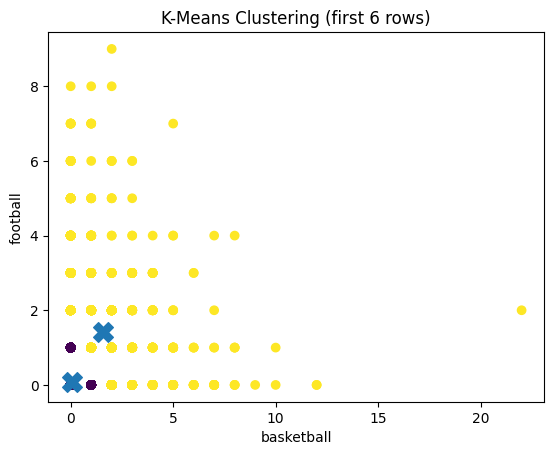

In [38]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(
    X["basketball"],
    X["football"],
    c=labels
)

# plot centroids
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="X",
    s=200
)

plt.xlabel("basketball")
plt.ylabel("football")
plt.title("K-Means Clustering (first 6 rows)")
plt.show()


In [39]:
c=df.loc[:5, "cluster"]

In [40]:
df = df[[
    "gradyear","gender","age","NumberOffriends",
    "basketball","football","soccer","softball",
    "volleyball","swimming"
]]


In [41]:
features = [
    "NumberOffriends",
    "basketball","football","soccer",
    "softball","volleyball","swimming"
]


In [45]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# -----------------------------
# Select features
# -----------------------------
X = df[[
    "basketball",
    "football"
]]  # keep 2 features for visualization

# -----------------------------
# Scale data (VERY IMPORTANT)
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# K-Means
# -----------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df["cluster"] = clusters



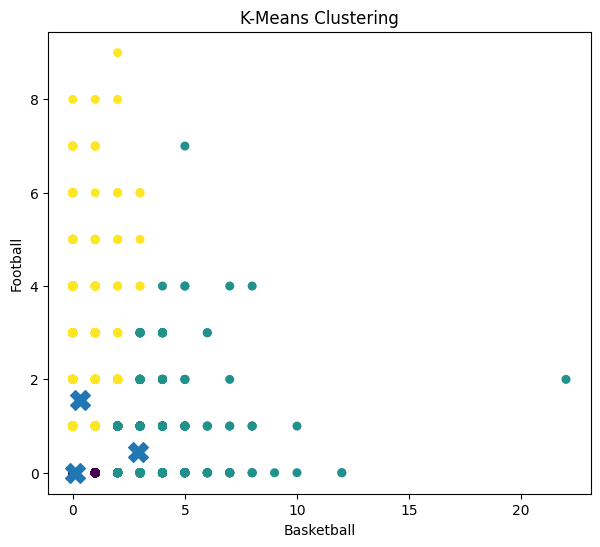

In [46]:
plt.figure(figsize=(7, 6))

plt.scatter(
    X["basketball"],
    X["football"],
    c=df["cluster"],
    s=30
)

# Plot centroids
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    s=200,
    marker="X"
)

plt.xlabel("Basketball")
plt.ylabel("Football")
plt.title("K-Means Clustering")
plt.show()



Best K (Elbow): 3


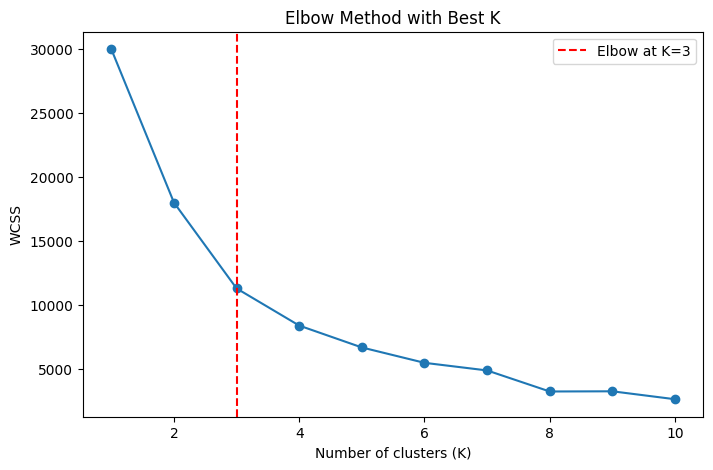

In [47]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# -----------------------------
# Select features
# -----------------------------
X = df[["basketball", "football"]]

# -----------------------------
# Scale data
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# Elbow Method to find optimal K
# -----------------------------
K = range(1, 11)  # test K from 1 to 10
wcss = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is WCSS

# Convert to numpy arrays for calculations
x = np.array(K)
y = np.array(wcss)

# Line between first and last point
line = np.polyfit([x[0], x[-1]], [y[0], y[-1]], 1)
y_line = np.polyval(line, x)

# Distance from each point to the line
distances = np.abs(y - y_line)
best_k = x[np.argmax(distances)]
print("Best K (Elbow):", best_k)

# -----------------------------
# Plot WCSS with elbow
# -----------------------------
plt.figure(figsize=(8,5))
plt.plot(K, wcss, marker='o')
plt.axvline(best_k, linestyle='--', color='red', label=f'Elbow at K={best_k}')
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method with Best K")
plt.legend()
plt.show()

# -----------------------------
# Fit KMeans with best K
# -----------------------------
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df["cluster"] = clusters


In [48]:
# Columns to check for outliers
cols = ["basketball", "football"]

# Remove outliers
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Data shape after removing outliers:", df.shape)


Data shape after removing outliers: (10957, 11)


In [51]:
from sklearn.metrics import silhouette_score

# Evaluate silhouette scores for each K
sil_scores = []
for k in range(2, 11):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.4f}")

C:\Users\USER PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [52]:
print(X_scaled.shape)
print(np.unique(X_scaled, axis=0).shape)  # number of unique points


(10957, 2)
(1, 2)


In [53]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

k = 2  # desired number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

num_clusters = len(np.unique(labels))
if num_clusters > 1:
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.4f}")
else:
    print(f"K={k} produced only {num_clusters} cluster(s), silhouette score cannot be computed.")


K=2 produced only 1 cluster(s), silhouette score cannot be computed.


C:\Users\USER PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
